In [1]:
import utility_common as common
from utility_dfcutter import *
from utility_dfplotter import *
import glob
import pandas as pd

In [2]:
oppoSign  = ' & (lepton1_q != lepton2_q) '
zveto     = ' & (dilepton_mass<80 | dilepton_mass>102) '
lmveto    = ' & (dilepton_mass>12) '
dict_cuts = {
    "mumu"  : "lepton1_pt>30 & lepton2_pt>10 & (nJets>=2) & (nBJets>=1)" + oppoSign + zveto + lmveto,
    "ee"    : "lepton1_pt>3 & lepton2_pt>20 & (nJets>=2) & (nBJets>=1)" + oppoSign + zveto + lmveto,
    "emu"   : "lepton1_pt>30 & (lepton2_pt<37 | (lepton2_pt>37 & lepton2_pt<lepton1_pt))  & (nJets>=2) & (nBJets>=1)" + oppoSign,
    "emu2"  : "lepton2_pt>37 & (lepton1_pt<30 | (lepton1_pt>30 & lepton1_pt<lepton2_pt))  & (nJets>=2) & (nBJets>=1)" + oppoSign,
    "mutau" : "lepton1_pt>30 & lepton2_pt>20 & (nJets>=2) & (nBJets>=1)" + oppoSign + lmveto,
    "etau"  : "lepton1_pt>37 & lepton2_pt>20 & (nJets>=2) & (nBJets>=1)" + oppoSign + lmveto,
    "mu4j"  : "lepton1_pt>30 & (nJets>=4) & (nBJets>=1)",
    "e4j"   : "lepton1_pt>37 & (nJets>=4) & (nBJets>=1)",
}

dict_subtitle = {
    "mumu"  : r"$\mu \mu$ Channel",
    "ee"    : r"$e e$ Channel",
    "emu"   : r"$\mu e$ Channel",
    "emu2"  : r"$e \mu$ Channel",
    "mutau" : r"$\mu \tau$ Channel",
    "etau"  : r"$e \tau$ Channel",
    "mu4j"  : r"$\mu + jets$ Channel",
    "e4j"   : r"$e + jets$ Channel",
}

In [11]:
for selection in dict_subtitle.keys():
    for period in ["2017"]:
        pickleFileDirName = 'emu' if selection == 'emu2' else selection
        pickleDirectry = common.getBaseDirectory() + "data/{}/{}/".format("pickles_"+period,pickleFileDirName)
        subtitle = dict_subtitle[selection]
        cuts = dict_cuts[selection]
        ############################################################################
        # data
        pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("data"))
        data = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
        data.reset_index(drop=True, inplace=True)
        if selection in ["emu","emu2"]:
            data = data.drop_duplicates(subset=['runNumber', 'evtNumber'])
        # tw
        pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("mct"))
        mct = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
        mct.reset_index(drop=True, inplace=True)
#         mct.eventWeight = mct.eventWeight*0.65
        # tt
        pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("mctt"))
        mctt = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
        mctt.reset_index(drop=True, inplace=True)
#         mctt.eventWeight = mctt.eventWeight*0.65
        # w
        pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("mcw"))
        mcw = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
        mcw.reset_index(drop=True, inplace=True)
#         mcw.eventWeight = mcw.eventWeight*0.65
        # z
        pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("mcz"))
        mcz = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
        mcz.reset_index(drop=True, inplace=True)
#         mcz.eventWeight = mcz.eventWeight*0.65
        # mcdiboson
        pickles = glob.glob(pickleDirectry + '{}/*.pkl'.format("mcdiboson"))
        mcvv = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
        mcvv.reset_index(drop=True, inplace=True)
#         mcvv.eventWeight = mcvv.eventWeight*0.65

        ############################################################################
        dfList   = [mcvv,mcz,mcw,mct,mctt,data]
        legends  = ['VV','Z','W',"t","tt","data"]
        colors   = ["C0", "C1", "C3","C2","C4",'k']
        common.makeDirectory("../plots/test_kinematics_{}/{}/".format(period,selection),clear=False)
        configs = pd.read_csv("../python/plotterItemTables/itemTable_{}.csv".format(pickleFileDirName))
        for index, row in configs.iterrows():
            v,a,b,step,xl = row['var'], row['lower'], row['upper'], row['step'], row['xlabel']
            sk = ASingleKinematicPlot(v,a,b,step,dfList)
            sk.settingPlot(xl,legends,colors,period=period)
            sk.makePlot()
            sk.axes[0].text(0.04*sk.b+0.96*sk.a,1.2*sk.ynorm, subtitle)
            #plt.savefig("../plots/kinematics/{}/{}.pdf".format(selection,v))
            plt.savefig("../plots/test_kinematics_{}/{}/{}.png".format(period,selection,v),dpi=300)
            plt.close()

In [13]:
selection, period = "e4j", "2017"

pickleFileDirName = selection


pickleDirectry = common.getBaseDirectory() + "data/{}/{}/".format("pickles_"+period,pickleFileDirName)
subtitle = dict_subtitle[selection]
cuts = dict_cuts[selection]

for p in "BCDEF":
    pickles = glob.glob(pickleDirectry + '{}/*{}.pkl'.format("data",p))
    data = pd.concat([ pd.read_pickle(pickle) for pickle in pickles],ignore_index=True).query(cuts)
    slt = dict_cuts[selection]
    data = data.query(slt)
    data.reset_index(drop=True, inplace=True)
    print(data.eventWeight.sum())

76045.0
183862.0
78327.0
167250.0
198595.0


In [3]:
import uproot

132100
272157
122666
271126
364149


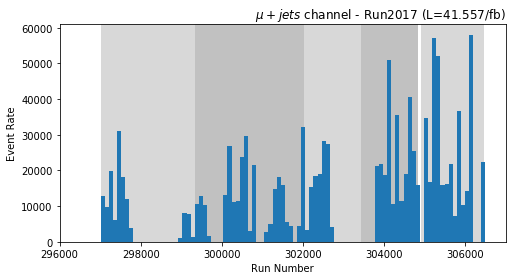

In [94]:
f = uproot.open("../data/root/Run2017_20200625.root")
arrays = []
for p in "BCDEF":
    t = f['mu4j/bltTree_muon_2017'+p]
    print(len(t))
    arrays.append(t.array('runNumber'))
data = np.concatenate(arrays)
del arrays

plt.figure(facecolor='w',figsize=(8,4))
plt.axvspan(297020,299329, color='0.5',alpha=0.3, linewidth=0)
plt.axvspan(299337,302029, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(302030,303434, color='0.5',alpha=0.3, linewidth=0)
plt.axvspan(303435,304826, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(304911,306462, color='0.5',alpha=0.3, linewidth=0)
plt.hist(data, bins=np.linspace(296000,307000,110),color='C0')
plt.xlim(296000,307000)
plt.xlabel("Run Number")
plt.ylabel("Event Rate")
plt.title(r" $\mu+jets$ channel - Run2017 (L=41.557/fb)",loc="right")
plt.savefig("run2017mu.png")

77356
187088
79665
169407
200879


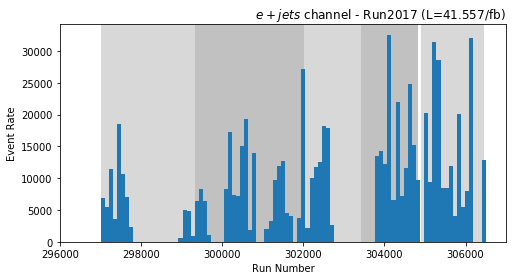

In [95]:
f = uproot.open("../data/root/Run2017_20200625.root")
arrays = []
for p in "BCDEF":
    t = f['e4j/bltTree_electron_2017'+p]
    print(len(t))
    arrays.append(t.array('runNumber'))
data = np.concatenate(arrays)
del arrays

plt.figure(facecolor='w',figsize=(8,4))

#plt.axvspan(294927,297019, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(297020,299329, color='0.5',alpha=0.3, linewidth=0)
plt.axvspan(299337,302029, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(302030,303434, color='0.5',alpha=0.3, linewidth=0)
plt.axvspan(303435,304826, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(304911,306462, color='0.5',alpha=0.3, linewidth=0)
plt.hist(data, bins=np.linspace(296000,307000,110),color='C0')
plt.xlim(296000,307000)
plt.xlabel("Run Number")
plt.ylabel("Event Rate")
plt.title(r" $e+jets$ channel - Run2017 (L=41.557/fb)",loc="right")
plt.savefig("run2017ele.png")

410858
200961
196041
894791


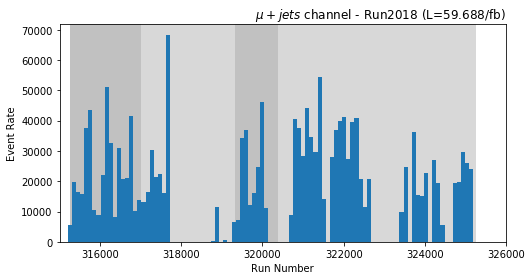

In [4]:
f = uproot.open("../data/root/Run2018_20200521.root")
arrays = []
for p in "ABCD":
    t = f['mu4j/bltTree_muon_2018'+p]
    print(len(t))
    arrays.append(t.array('runNumber'))
data = np.concatenate(arrays)
del arrays

plt.figure(facecolor='w',figsize=(8,4))
plt.axvspan(315252,316995, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(316998,319312, color='0.5',alpha=0.3, linewidth=0)
plt.axvspan(319313,320393, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(320394,325273, color='0.5',alpha=0.3, linewidth=0)
plt.hist(data, bins=np.linspace(315000,326000,110),color='C0')
plt.xlim(315000,326000)
plt.xlabel("Run Number")
plt.ylabel("Event Rate")
plt.title(r" $\mu+jets$ channel - Run2018 (L=59.688/fb)",loc="right")
plt.savefig("run2018mu.png")

257877
128205
125371
576191


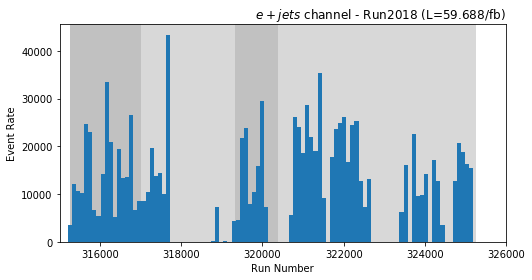

In [5]:
f = uproot.open("../data/root/Run2018_20200521.root")
arrays = []
for p in "ABCD":
    t = f['e4j/bltTree_electron_2018'+p]
    print(len(t))
    arrays.append(t.array('runNumber'))
data = np.concatenate(arrays)
del arrays

plt.figure(facecolor='w',figsize=(8,4))
plt.axvspan(315252,316995, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(316998,319312, color='0.5',alpha=0.3, linewidth=0)
plt.axvspan(319313,320393, color='0.2',alpha=0.3, linewidth=0)
plt.axvspan(320394,325273, color='0.5',alpha=0.3, linewidth=0)
plt.hist(data, bins=np.linspace(315000,326000,110),color='C0')
plt.xlim(315000,326000)
plt.xlabel("Run Number")
plt.ylabel("Event Rate")
plt.title(r" $e+jets$ channel - Run2018 (L=59.688/fb)",loc="right")
plt.savefig("run2018ele.png")